In [ ]:
import pandas as pd

In [ ]:
tweets = pd.read_csv('/content/final_dataset.csv')

In [ ]:
tweets.head()

,Tweet,Sentiment
0,RUU Cipta Kerja jelas akan mempermudah peluang...,1
1,RUU Cipta Kerja ini dapat memberikan kepastian...,1
2,#GejayanMemanggilLagi\n#gejayanmemanggil\n#Ge...,0
3,Pemerintah &amp; wakil rakyat itu seharusnya m...,0
4,Jadi ini yang gue tangkep sehabis gue nonton p...,1


In [ ]:
tweets['Sentiment'].value_counts()

0    502
1    498
Name: Sentiment, dtype: int64

In [ ]:
print(tweets['Tweet'][90]+"\n") #d1
print(tweets['Tweet'][77]+"\n") #d2
print(tweets['Tweet'][161]+"\n") #d3
print(tweets['Tweet'][38]+"\n") #d4
print(tweets['Tweet'][100]+"\n") #d5

UU Cipta kerja menopang pembangunan ekonomi secara seimbang tumbuh berdampingan dengan menjaga lingkungan secara berkelanjutan dan kesejahteraan sosial
#OmnibusLawLestari https://t.co/3rrSPBkFJJ

@Amal_Alghozali Sdh Seminggu Sy Diam mk Waktunya Sy Komen TAJAM!
Sy Jabarkan scr Sederhana shg bs Dipahami Netizen BODOH!
RUU Cipta Kerja yg Alurnya "Memudahkan Para Pengusaha adl NOL BESAR" krn yg Diincar adl GAJI BURUH RENDAH!
Mau Bukti??
Bs Cek ada Brp Industri Manufaktur di Jabar yg TUTUP!

Omnibus Law UU Cipta Kerja adalah skandal legislasi.

#MosiTidakPercaya 
#AwasHoaxRezim https://t.co/p8fqm3jlbu

RUU Cipta Kerja berpotensi mengancam berbagai dimensi kehidupan, mulai dari mundurnya kualitas demokrasi, meningkatnya risiko bencana ekologis di masa mendatang, hingga hak hidup orang banyak yang dipertaruhkan. 
#batalkanomnibuslaw

Dengan RUU cipta kerja bisa meningkatkan upah minimum buruh tiap tahunnya #RakyatButuhKerja https://t.co/FFhSin7jYe



##Case Folding

In [ ]:
import re
from bs4 import BeautifulSoup

def case_folding(tweet):
    replacements = [(r"(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$", ""),
                    (r'#[\w]*',""),
                    (r'@[\w]*',""),
                    ]
    for old, new in replacements:
        tweet = re.sub(old, new, tweet)

    tweet = BeautifulSoup(tweet, "lxml").text #hapus html formatting (&amp;, &lt:, &gt:)
    tweet = re.sub('[^a-zA-Z]', ' ', tweet) #lowercase dan hapus karakter lain
    tweet = tweet.lower()
    return tweet

case_folded_tweets = [case_folding(tweet) for tweet in tweets['Tweet']]

In [ ]:
print(case_folded_tweets[90]) #d1
print(case_folded_tweets[77]) #d2
print(case_folded_tweets[161]) #d3
print(case_folded_tweets[38]) #d4
print(case_folded_tweets[100]) #d5

uu cipta kerja menopang pembangunan ekonomi secara seimbang tumbuh berdampingan dengan menjaga lingkungan secara berkelanjutan dan kesejahteraan sosial  
sdh seminggu sy diam mk waktunya sy komen tajam  sy jabarkan scr sederhana shg bs dipahami netizen bodoh  ruu cipta kerja yg alurnya  memudahkan para pengusaha adl nol besar  krn yg diincar adl gaji buruh rendah  mau bukti   bs cek ada brp industri manufaktur di jabar yg tutup 
omnibus law uu cipta kerja adalah skandal legislasi      
ruu cipta kerja berpotensi mengancam berbagai dimensi kehidupan  mulai dari mundurnya kualitas demokrasi  meningkatnya risiko bencana ekologis di masa mendatang  hingga hak hidup orang banyak yang dipertaruhkan   
dengan ruu cipta kerja bisa meningkatkan upah minimum buruh tiap tahunnya  


##Tokenisasi

In [ ]:
tokenized_tweets = [tweet.split() for tweet in case_folded_tweets]

In [ ]:
print(tokenized_tweets[90]) #d1
print(tokenized_tweets[77]) #d2
print(tokenized_tweets[161]) #d3
print(tokenized_tweets[38]) #d4
print(tokenized_tweets[100]) #d5

['uu', 'cipta', 'kerja', 'menopang', 'pembangunan', 'ekonomi', 'secara', 'seimbang', 'tumbuh', 'berdampingan', 'dengan', 'menjaga', 'lingkungan', 'secara', 'berkelanjutan', 'dan', 'kesejahteraan', 'sosial']
['sdh', 'seminggu', 'sy', 'diam', 'mk', 'waktunya', 'sy', 'komen', 'tajam', 'sy', 'jabarkan', 'scr', 'sederhana', 'shg', 'bs', 'dipahami', 'netizen', 'bodoh', 'ruu', 'cipta', 'kerja', 'yg', 'alurnya', 'memudahkan', 'para', 'pengusaha', 'adl', 'nol', 'besar', 'krn', 'yg', 'diincar', 'adl', 'gaji', 'buruh', 'rendah', 'mau', 'bukti', 'bs', 'cek', 'ada', 'brp', 'industri', 'manufaktur', 'di', 'jabar', 'yg', 'tutup']
['omnibus', 'law', 'uu', 'cipta', 'kerja', 'adalah', 'skandal', 'legislasi']
['ruu', 'cipta', 'kerja', 'berpotensi', 'mengancam', 'berbagai', 'dimensi', 'kehidupan', 'mulai', 'dari', 'mundurnya', 'kualitas', 'demokrasi', 'meningkatnya', 'risiko', 'bencana', 'ekologis', 'di', 'masa', 'mendatang', 'hingga', 'hak', 'hidup', 'orang', 'banyak', 'yang', 'dipertaruhkan']
['dengan',

##Normalisasi

In [ ]:
normalized_word = pd.read_csv('/content/normalisasi.csv')

normalized_word_dict = {}

def normalized(tweet):
    for index, row in normalized_word.iterrows():
        if row[0] not in normalized_word_dict:
            normalized_word_dict[row[0]] = row[1] 
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in tweet]

normalized_tweets = [normalized(tweet) for tweet in tokenized_tweets]

In [ ]:
print(normalized_tweets[90]) #d1
print(normalized_tweets[77]) #d2
print(normalized_tweets[161]) #d3
print(normalized_tweets[38]) #d4
print(normalized_tweets[121]) #d5

['uu', 'cipta', 'kerja', 'menopang', 'pembangunan', 'ekonomi', 'secara', 'seimbang', 'tumbuh', 'berdampingan', 'dengan', 'menjaga', 'lingkungan', 'secara', 'berkelanjutan', 'dan', 'kesejahteraan', 'sosial']
['sudah', 'seminggu', 'saya', 'diam', 'mk', 'waktunya', 'saya', 'komentar', 'tajam', 'saya', 'jabarkan', 'secara', 'sederhana', 'sehingga', 'bisa', 'dipahami', 'netizen', 'bodoh', 'ruu', 'cipta', 'kerja', 'yang', 'alurnya', 'memudahkan', 'para', 'pengusaha', 'adalah', 'nol', 'besar', 'karena', 'yang', 'diincar', 'adalah', 'gaji', 'buruh', 'rendah', 'mau', 'bukti', 'bisa', 'cek', 'ada', 'berapa', 'industri', 'manufaktur', 'di', 'jabar', 'yang', 'tutup']
['omnibus', 'law', 'uu', 'cipta', 'kerja', 'adalah', 'skandal', 'legislasi']
['ruu', 'cipta', 'kerja', 'berpotensi', 'mengancam', 'berbagai', 'dimensi', 'kehidupan', 'mulai', 'dari', 'mundurnya', 'kualitas', 'demokrasi', 'meningkatnya', 'resiko', 'bencana', 'ekologis', 'di', 'masa', 'mendatang', 'hingga', 'hak', 'hidup', 'orang', 'ban

##Stopword Removal

In [ ]:
list_stopwords = ['a','ada','adalah','adanya','adapun','agak','agaknya','agar','akan','akankah','akhir',
            'akhiri','akhirnya','aku','akulah','amat','amatlah','anda','andalah','antar','antara',
            'antaranya','apa','apaan','apabila','apakah','apalagi','apatah','arti','artinya','asal',
            'asalkan','atas','atau','ataukah','ataupun','awal','awalnya','b','bagai','bagaikan',
            'bagaimana','bagaimanakah','bagaimanapun','bagainamakah','bagi','bagian','bahkan','bahwa',
            'bahwasannya','bahwasanya','baik','baiklah','bakal','bakalan','balik','banyak','bapak',
            'baru','bawah','beberapa','begini','beginian','beginikah','beginilah','begitu','begitukah',
            'begitulah','begitupun','belakang','belakangan','berada','berakhir','berakhirlah','berakhirnya','berapa','berapakah',
            'berapalah','berapapun','berarti','berawal','berbagai','berdatangan','beri','berikan',
            'berikut','berikutnya','berjumlah','berkali-kali','berkata','berkehendak','berkeinginan',
            'berkenaan','berlainan','berlalu','berlangsung','berlebihan','bermacam','bermacam-macam',
            'bermaksud','bermula','bersama','bersama-sama','bersiap','bersiap-siap','bertanya',
            'bertanya-tanya','berturut','berturut-turut','bertutur','berujar','berupa','besar',
            'betulkah','biasa','biasanya','bila','bilakah','bisa','bisakah','boleh','bolehkah',
            'bolehlah','buat','bulan','bung','c','cara',
            'caranya','cukup','cukupkah','cukuplah','cuma','d','dahulu','dalam','dan','dapat','dari',
            'daripada','datang','dekat','demi','demikian','demikianlah','dengan','depan','di','dia',
            'diakhiri','diakhirinya','dialah','diantara','diantaranya','diberi','diberikan','diberikannya',
            'dibuat','dibuatnya','didapat','didatangkan','digunakan','diibaratkan','diibaratkannya',
            'diingat','diingatkan','diinginkan','dijawab','dijelaskan','dijelaskannya','dikarenakan',
            'dikatakan','dikatakannya','diketahui','diketahuinya','dikira','dilakukan',
            'dilalui','dilihat','dimaksud','dimaksudkan','dimaksudkannya','dimaksudnya','diminta',
            'dimintai','dimisalkan','dimulai','dimulailah','dimulainya','dimungkinkan','dini','dipastikan',
            'diperbuat','diperbuatnya','dipergunakan','diperkirakan','diperlihatkan','diperlukan',
            'diperlukannya','dipersoalkan','dipertanyakan','dipunyai','diri','dirinya','disampaikan',
            'disebut','disebutkan','disebutkannya','disini','disinilah','ditambahkan','ditandaskan',
            'ditanya','ditanyai','ditanyakan','ditegaskan','ditujukan','ditunjuk','ditunjuki','ditunjukkan',
            'ditunjukkannya','ditunjuknya','dituturkan','dituturkannya','diucapkan','diucapkannya',
            'diungkapkan','dong','dua','dulu','e','empat','enak','enggak','enggaknya','entah','entahlah',
            'f','g','guna','gunakan','h','hadap','hai','hal','halo','hallo','hampir','hanya','hanyalah',
            'hari','harus','haruslah','harusnya','helo','hello','hendak','hendaklah','hendaknya','hingga',
            'i','ia','ialah','ibarat','ibaratkan','ibaratnya','ibu','ikut','ingat','ingat-ingat','ingin',
            'inginkah','inginkan','ini','inikah','inilah','itu','itukah','itulah','j','jadi','jadilah',
            'jadinya','jangan','jangankan','janganlah','jauh','jawab','jawaban','jawabnya','jelas',
            'jelaskan','jelaslah','jelasnya','jika','jikalau','juga','jumlah','jumlahnya','justru',
            'k','kadar','kala','kalau','kalaulah','kalaupun','kali','kalian','kami','kamilah','kamu',
            'kamulah','kan','kapan','kapankah','kapanpun','karena','karenanya','kasus','kata','katakan',
            'katakanlah','katanya','ke','keadaan','kebetulan','kecil','kedua','keduanya','keinginan',
            'kelamaan','kelihatan','kelihatannya','kelima','keluar','kembali','kemudian','kemungkinan',
            'kemungkinannya','kena','kenapa','kepada','kepadanya','kesampaian','keseluruhan',
            'keseluruhannya','keterlaluan','ketika','khusus','khususnya','kini','kinilah','kira',
            'kira-kira','kiranya','kita','kitalah','kok','kurang','l','lagi','lagian','lah','lain',
            'lainnya','laku','lalu','lama','lamanya','langsung','lanjut','lanjutnya','lebih','lewat',
            'lihat','lima','luar','m','macam','maka','makanya','makin','maksud','malah','malahan',
            'mampu','mampukah','mana','manakala','manalagi','masa','masih',
            'masihkah','masing','masing-masing','masuk','mata','mau','maupun','melainkan','melakukan',
            'melalui','melihat','melihatnya','memang','memastikan','memberi','memberikan','membuat',
            'memerlukan','memihak','meminta','memintakan','memisalkan','memperbuat','mempergunakan',
            'memperkirakan','memperlihatkan','mempersiapkan','mempersoalkan','mempertanyakan','mempunyai',
            'memulai','memungkinkan','menaiki','menambahkan','menandaskan','menanti','menanti-nanti',
            'menantikan','menanya','menanyai','menanyakan','mendapat','mendapatkan','mendatang','mendatangi',
            'mendatangkan','menegaskan','mengakhiri','mengapa','mengatakan','mengatakannya','mengenai',
            'mengerjakan','mengetahui','menggunakan','menghendaki','mengibaratkan','mengibaratkannya',
            'mengingat','mengingatkan','menginginkan','mengira','mengucapkan','mengucapkannya','mengungkapkan',
            'menjadi','menjawab','menjelaskan','menuju','menunjuk','menunjuki','menunjukkan','menunjuknya',
            'menurut','menuturkan','menyampaikan','menyangkut','menyatakan','menyebutkan','menyeluruh',
            'menyiapkan','merasa','mereka','merekalah','merupakan','meski','meskipun','meyakini','meyakinkan',
            'minta','mirip','misal','misalkan','misalnya','mohon','mula','mulai','mulailah','mulanya','mungkin',
            'mungkinkah','n','nah','naik','namun','nanti','nantinya','nya','nyaris','nyata','nyatanya',
            'o','oleh','olehnya','orang','p','pada','padahal','padanya','pak','paling','panjang','pantas',
            'para','pasti','pastilah','penting','pentingnya','per','percuma','perlu','perlukah','perlunya',
            'pernah','persoalan','pertama','pertama-tama','pertanyaan','pertanyakan','pihak','pihaknya',
            'pukul','pula','pun','punya','q','r','rasa','rasanya','rupa','rupanya','s','saat','saatnya','saja',
            'sajalah','salam','saling','sama','sama-sama','sambil','sampai','sampai-sampai','sampaikan','sana',
            'sangat','sangatlah','sangkut','satu','saya','sayalah','se','sebab','sebabnya','sebagai',
            'sebagaimana','sebagainya','sebagian','sebaik','sebaik-baiknya','sebaiknya','sebaliknya',
            'sebanyak','sebegini','sebegitu','sebelum','sebelumnya','sebenarnya','seberapa','sebesar',
            'sebetulnya','sebisanya','sebuah','sebut','sebutlah','sebutnya','secara','secukupnya','sedang',
            'sedangkan','sedemikian','sedikit','sedikitnya','seenaknya','segala','segalanya','segera',
            'seharusnya','sehingga','seingat','sejak','sejauh','sejenak','sejumlah','sekadar','sekadarnya',
            'sekali','sekali-kali','sekalian','sekaligus','sekalipun','sekarang','sekaranglah','sekecil',
            'seketika','sekiranya','sekitar','sekitarnya','sekurang-kurangnya','sekurangnya','sela','selain',
            'selaku','selalu','selama','selama-lamanya','selamanya','selanjutnya','seluruh','seluruhnya',
            'semacam','semakin','semampu','semampunya','semasa','semasih','semata','semata-mata','semaunya',
            'sementara','semisal','semisalnya','sempat','semua','semuanya','semula','sendiri','sendirian',
            'sendirinya','seolah','seolah-olah','seorang','sepanjang','sepantasnya','sepantasnyalah',
            'seperlunya','seperti','sepertinya','sepihak','sering','seringnya','serta','serupa','sesaat',
            'sesama','sesampai','sesegera','sesekali','seseorang','sesuatu','sesuatunya','sesudah',
            'sesudahnya','setelah','setempat','setengah','seterusnya','setiap','setiba','setibanya',
            'setidak-tidaknya','setidaknya','setinggi','seusai','sewaktu','siap','siapa','siapakah',
            'siapapun','sini','sinilah','soal','soalnya','suatu','sudah','sudahkah','sudahlah','supaya',
            't','tadi','tadinya','tahu','tak','tambah','tambahnya','tampak','tampaknya','tandas','tandasnya',
            'tanpa','tanya','tanyakan','tanyanya','tapi','tegas','tegasnya','telah','tempat','tentang','tentu',
            'tentulah','tentunya','tepat','terakhir','terasa','terbanyak','terdahulu','terdapat','terdiri',
            'terhadap','terhadapnya','teringat','teringat-ingat','terjadi','terjadilah','terjadinya','terkira',
            'terlalu','terlebih','terlihat','termasuk','ternyata','tersampaikan','tersebut','tersebutlah',
            'tertentu','tertuju','terus','terutama','tetap','tetapi','tiap','tiba','tiba-tiba',
            'tidakkah','tidaklah','tiga','toh','tuju','tunjuk','turut','tutur','tuturnya','u','ucap','ucapnya',
            'ujar','ujarnya','umumnya','ungkap','ungkapnya','untuk','usah','usai','v','w','waduh','wah','wahai',
            'waktunya','walau','walaupun','wong','x','y','ya','yaitu','yakin','yakni','yang','z', 'kompas', 'cont', 'com']

def remove_stopwords(tweet):
    return [term for term in tweet if term not in list_stopwords]

removed_stopwords_tweets = [remove_stopwords(tweet) for tweet in normalized_tweets]

In [ ]:
print(removed_stopwords_tweets[90]) #d1
print(removed_stopwords_tweets[77]) #d2
print(removed_stopwords_tweets[161]) #d3
print(removed_stopwords_tweets[38]) #d4
print(removed_stopwords_tweets[121]) #d5

['uu', 'cipta', 'kerja', 'menopang', 'pembangunan', 'ekonomi', 'seimbang', 'tumbuh', 'berdampingan', 'menjaga', 'lingkungan', 'berkelanjutan', 'kesejahteraan', 'sosial']
['seminggu', 'diam', 'mk', 'komentar', 'tajam', 'jabarkan', 'sederhana', 'dipahami', 'netizen', 'bodoh', 'ruu', 'cipta', 'kerja', 'alurnya', 'memudahkan', 'pengusaha', 'nol', 'diincar', 'gaji', 'buruh', 'rendah', 'bukti', 'cek', 'industri', 'manufaktur', 'jabar', 'tutup']
['omnibus', 'law', 'uu', 'cipta', 'kerja', 'skandal', 'legislasi']
['ruu', 'cipta', 'kerja', 'berpotensi', 'mengancam', 'dimensi', 'kehidupan', 'mundurnya', 'kualitas', 'demokrasi', 'meningkatnya', 'resiko', 'bencana', 'ekologis', 'hak', 'hidup', 'dipertaruhkan']
['uu', 'cipta', 'kerja', 'menciptakan', 'lapangan', 'kerja']


##Stemming

In [ ]:
pip install PySastrawi

     |████████████████████████████████| 215kB 10.3MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

join_tweet = [" ".join(tweet) for tweet in removed_stopwords_tweets]
stemmed_tweets = [stemmer.stem(word) for word in join_tweet]

In [ ]:
print(stemmed_tweets[90]) #d1
print(stemmed_tweets[77]) #d2
print(stemmed_tweets[161]) #d3
print(stemmed_tweets[38]) #d4
print(stemmed_tweets[121]) #d5

uu cipta kerja topang bangun ekonomi imbang tumbuh damping jaga lingkung lanjut sejahtera sosial
minggu diam mk komentar tajam jabar sederhana paham netizen bodoh ruu cipta kerja alur mudah usaha nol incar gaji buruh rendah bukti cek industri manufaktur jabar tutup
omnibus law uu cipta kerja skandal legislasi
ruu cipta kerja potensi ancam dimensi hidup mundur kualitas demokrasi tingkat resiko bencana ekologis hak hidup taruh
uu cipta kerja cipta lapang kerja


#Store Into DataFrame

In [ ]:
data = {'Tweet':stemmed_tweets, 'Sentiment':tweets['Sentiment']} 
preprocessed_dataset = pd.DataFrame(data) 

In [ ]:
preprocessed_dataset.head(10)

,Tweet,Sentiment
0,ruu cipta kerja mudah peluang investasi regula...,1
1,ruu cipta kerja pasti hukum usaha pasti hukum ...,1
2,omnibus law ruu cipta kerja penting investor b...,0
3,perintah wakil rakyat lindung rakyat indonesia...,0
4,tangkap habis nonton jelas jokowi ruu cipta ke...,1
5,tolak uu cipta kerja,0
6,uu cipta kerja tidak cipta lapang kerja kuat o...,0
7,waka mpr fpd syarief hasan ruu cipta kerja kar...,0
8,bahas uu cipta kerja taat prosedural,1
9,cipta kerja depan pasti hukum usaha kerja kait...,1


#TF-IDF

In [ ]:
import pandas as pd
X = preprocessed_dataset['Tweet']
y = preprocessed_dataset['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()    
tfidf = vectorizer.fit_transform(X).toarray()

In [ ]:
import pickle

pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))

In [ ]:
tfidfDataFrame = pd.DataFrame(tfidf, columns=vectorizer.get_feature_names())

In [ ]:
tfidfDataFrame.to_csv('tfidf.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.1, random_state=42)

In [ ]:
y_test.value_counts()

1    53
0    47
Name: Sentiment, dtype: int64

In [ ]:
data_latih = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
data_latih.head(10)

,aamiin,abad,abai,abaikan,abisnya,abk,acak,acaman,acuan,adat,ade,adhinegara,adik,adil,admin,administrasi,adttya,afy,agenda,agr,agraria,ah,ahli,aice,aids,air,airlangga,aja,ajukan,akademis,akademisi,akibat,akn,akomodasi,akselerasi,akses,aksi,aktivis,aktivitas,akun,...,wenangan,what,why,widodo,wilayah,willy,wiraswasta,wirausaha,wirausahawan,with,work,world,wow,wpmnvxy,wpp,wr,wujud,wujudkan,wxanbn,yaa,yaaa,yakinlah,yaps,yes,yogya,yok,you,your,yth,yudhistira,yudikatif,yuk,yuuuk,zalim,zalimi,zaman,zero,zona,zonk,zul
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.271463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172116,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test.value_counts()

1    54
0    46
Name: Sentiment, dtype: int64

#Pengujian Konvergensi

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
tabel_percobaan = pd.DataFrame()
y_pred_proba = []
y_pred = []
for i in range(5):
    clf = MLPClassifier(    activation='logistic', 
                            learning_rate_init=0.5, 
                            tol= -1,
                            max_iter=300, 
                            solver='sgd',
                            momentum=0,
                            learning_rate='constant',
                            hidden_layer_sizes=(10))
    clf.fit(X_train, y_train)
print (clf.n_layers_)
print (clf.n_iter_)
print (clf.loss_)

y_pred_proba.append(clf.predict_proba(X_test))
y_pred.append(clf.predict(X_test))


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3
300
0.1086050554821753


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


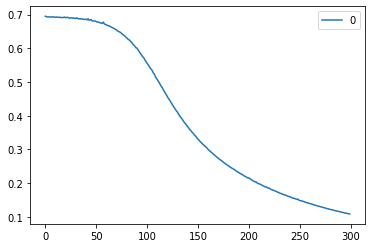

In [ ]:
pd.DataFrame(clf.loss_curve_).plot()

In [ ]:
accuracy_score(y_test, y_pred[0])

0.93

In [ ]:
y_pred_proba

[array([[9.89216037e-01, 1.07839631e-02],
        [9.56122816e-03, 9.90438772e-01],
        [9.95058128e-01, 4.94187238e-03],
        [7.27058980e-01, 2.72941020e-01],
        [3.08411364e-06, 9.99996916e-01],
        [9.99934375e-01, 6.56254196e-05],
        [2.79190917e-02, 9.72080908e-01],
        [3.50264097e-01, 6.49735903e-01],
        [9.90935093e-01, 9.06490711e-03],
        [9.91391342e-01, 8.60865808e-03],
        [1.91162838e-03, 9.98088372e-01],
        [9.99922578e-01, 7.74223188e-05],
        [7.67335166e-04, 9.99232665e-01],
        [6.10859670e-03, 9.93891403e-01],
        [1.76088189e-03, 9.98239118e-01],
        [6.42278813e-01, 3.57721187e-01],
        [9.99380629e-01, 6.19370608e-04],
        [3.96464212e-05, 9.99960354e-01],
        [3.03133796e-05, 9.99969687e-01],
        [9.99895055e-01, 1.04945037e-04],
        [9.77952522e-01, 2.20474780e-02],
        [9.90051165e-01, 9.94883536e-03],
        [9.95852329e-01, 4.14767086e-03],
        [2.25490731e-01, 7.7450926

In [ ]:
tabel_percobaan['Rata-Rata'] = tabel_percobaan.mean(axis=1)

In [ ]:
tabel_percobaan.to_csv('tabel_percobaan_fix.csv')

#Pengujian Hidden Node pada Hidden Layer

##10 Node

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score_10_node= []
for i in range(5):
    clf = MLPClassifier( activation='logistic', 
                        learning_rate_init=0.5, 
                        tol= -1, 
                        max_iter=1000, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))

    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    score_10_node.append(accuracy_score(y_test, y_pred))

score_10_node

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score_10_node= []
# for i in range(5):
clf = MLPClassifier( activation='logistic', 
                        learning_rate_init=0.5, 
                        tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(100,50,10))

clf.fit(X_train, y_train)    
y_pred = clf.predict(X_test)
score_10_node.append(accuracy_score(y_test, y_pred))

score_10_node

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.88]

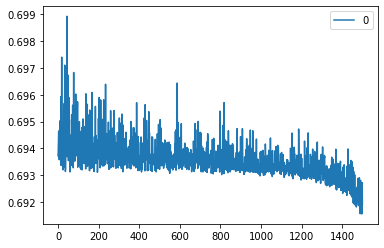

In [ ]:
pd.DataFrame(clf.loss_curve_).plot()

##50 Node

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
tabel_percobaan_50 = pd.DataFrame()

score_50_node= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                            learning_rate_init=0.5, 
                            tol= -1, 
                            max_iter=1500, 
                            solver='sgd',
                            momentum=0,
                            learning_rate='constant',
                           hidden_layer_sizes=(50,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_50_node.append(accuracy_score(y_test, y_pred))
    tabel_percobaan_50.insert(i, "Percobaan (%i)" % i, clf.loss_curve_)
# print("--- %s seconds ---" % (time.time() - start_time))

print(score_50_node)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 100 Node

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score_100_node= []
# import time
# start_time = time.time()

for i in range(5):
    clf = MLPClassifier( activation='logistic', 
                            learning_rate_init=0.5, 
                            tol= -1, 
                            max_iter=1500, 
                            solver='sgd',
                            momentum=0,
                            learning_rate='constant',
                        hidden_layer_sizes=(100,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_100_node.append(accuracy_score(y_test, y_pred))
# print("--- %s seconds ---" % (time.time() - start_time))

print(score_100_node)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##200 Node

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score_200_node= []

# start_time = time.time()
for i in range(5):
    clf = MLPClassifier( activation='logistic', 
                            learning_rate_init=0.5, 
                            tol= -1, 
                            max_iter=1500, 
                            solver='sgd',
                            momentum=0,
                            learning_rate='constant',
                        hidden_layer_sizes=(200,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_200_node.append(accuracy_score(y_test, y_pred))

# print("--- %s seconds ---" % (time.time() - start_time))

print(score_200_node)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[0.95, 0.95, 0.53, 0.47, 0.53]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


#Pengujian Learning Rate

##0.1

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


score_01= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.1, 
                        tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_01.append(accuracy_score(y_test, y_pred))

print(score_01)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.94, 0.93, 0.94, 0.94, 0.94]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 0.2

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



score_02= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.2, 
                        tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_02.append(accuracy_score(y_test, y_pred))

print(score_02)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.96, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.3

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


score_03= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.3, 
                        tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_03.append(accuracy_score(y_test, y_pred))

print(score_03)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.4

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


score_04= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.4, 
                       tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_04.append(accuracy_score(y_test, y_pred))

print(score_04)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.5

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score_05= []


for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                            learning_rate_init=0.5, 
                          tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_05.append(accuracy_score(y_test, y_pred))

print(score_05)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.6

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


score_06= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.6, 
                      tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_06.append(accuracy_score(y_test, y_pred))

print(score_06)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.7

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


score_07= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.7, 
                       tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_07.append(accuracy_score(y_test, y_pred))

print(score_07)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.8


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


score_08= []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.8, 
                      tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_08.append(accuracy_score(y_test, y_pred))

print(score_08)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##0.9

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score_09= []


for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.9, 
                        tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_09.append(accuracy_score(y_test, y_pred))

print(score_09)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#Evaluasi Performa

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
score_hidden_layer_075= []
f1_score_075 = []
precision_score_075 = []
recall_score_075 = []
cf = []
for i in range(5):
    clf = MLPClassifier(activation='logistic', 
                        learning_rate_init=0.2, 
                        tol= -1, 
                        max_iter=1500, 
                        solver='sgd',
                        momentum=0,
                        learning_rate='constant',
                        hidden_layer_sizes=(10,))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    score_hidden_layer_075.append(accuracy_score(y_test, y_pred))
    f1_score_075.append(f1_score(y_test, y_pred))
    precision_score_075.append(precision_score(y_test, y_pred))
    recall_score_075.append(recall_score(y_test, y_pred))
    cf.append(confusion_matrix(y_test, y_pred))

print(score_hidden_layer_075)
print(f1_score_075)
print(precision_score_075)
print(recall_score_075)
print(cf)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[0.95, 0.95, 0.95, 0.95, 0.95]
[0.9514563106796116, 0.9514563106796116, 0.9514563106796116, 0.9514563106796116, 0.9514563106796116]
[0.98, 0.98, 0.98, 0.98, 0.98]
[0.9245283018867925, 0.9245283018867925, 0.9245283018867925, 0.9245283018867925, 0.9245283018867925]
[array([[46,  1],
       [ 4, 49]]), array([[46,  1],
       [ 4, 49]]), array([[46,  1],
       [ 4, 49]]), array([[46,  1],
       [ 4, 49]]), array([[46,  1],
       [ 4, 49]])]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Save the model

In [ ]:
import pickle

filename = 'finalized_classifier.pkl'
pickle.dump(clf, open(filename, 'wb'))

Load the model


In [ ]:
loaded_model = pickle.load(open('finalized_classifier.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

#World Cloud

In [ ]:
del preprocessed_dataset_negative
del preprocessed_dataset_positive

In [ ]:
new_stopwords = ['cipta', 'kerja', 'ciptakerja', 'omnibus', 'law', 'uu', 'ruu', 'lapang', 'cilaka', 'omnibuslaw', 'aja', 'tidak', 'indonesia', 'undang', 'rakyat', ]
for i in new_stopwords:
    if i not in list_stopwords:
        list_stopwords.append(i)

In [ ]:
data_wordcloud = {'Tweet':join_tweet, 'Sentiment':tweets['Sentiment']} 
wordcloud_document = pd.DataFrame(data_wordcloud) 

In [ ]:
preprocessed_dataset_negative = [tweet.split() for tweet in wordcloud_document[wordcloud_document['Sentiment']==0].Tweet]
preprocessed_dataset_positive = [tweet.split() for tweet in wordcloud_document[wordcloud_document['Sentiment']==1].Tweet]

In [ ]:
def remove_stopwords(tweet):
    return [term for term in tweet if term not in list_stopwords]


preprocessed_dataset_negative = [remove_stopwords(tweet) for tweet in preprocessed_dataset_negative]
preprocessed_dataset_positive = [remove_stopwords(tweet) for tweet in preprocessed_dataset_positive]

In [ ]:
preprocessed_dataset_negative = [" ".join(tweet) for tweet in preprocessed_dataset_negative]
preprocessed_dataset_positive = [" ".join(tweet) for tweet in preprocessed_dataset_positive]

In [ ]:
preprocessed_dataset_negative

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt


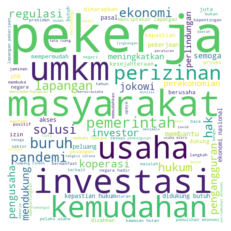

In [ ]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('/content/square.png'))
positive_wordcloud = " ".join(tweet for tweet in preprocessed_dataset_positive)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=256, max_words=100, 
                      mask=mask, background_color="white",
                      random_state=42, width=mask.shape[1],
                      height=mask.shape[0]).generate(positive_wordcloud)

# Display the generated image:
wordcloud.to_file("/content/sentimen_positif.png")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
circle_mask = np.array(Image.open('/content/circle.png'))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_circle_mask = np.ndarray((circle_mask.shape[0],circle_mask.shape[1]), np.int32)

for i in range(len(circle_mask)):
    transformed_circle_mask[i] = list(map(transform_format, circle_mask[i]))

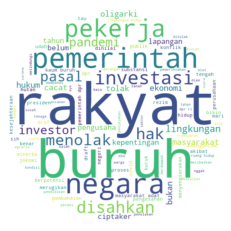

dict_keys(['rakyat', 'buruh', 'pemerintah', 'negara', 'pekerja', 'investasi', 'disahkan', 'hak', 'menolak', 'pasal', 'pandemi', 'investor', 'lingkungan', 'masyarakat', 'oligarki', 'cacat', 'bukan', 'hukum', 'ekonomi', 'tolak', 'kepentingan', 'lapangan', 'ciptaker', 'pengusaha', 'tahun', 'belum', 'masyarakat adat', 'pembahasan', 'hidup', 'sih', 'proses', 'presiden', 'publik', 'berpotensi', 'tengah', 'merugikan', 'covid', 'udah', 'bikin', 'kesejahteraan', 'jokowi', 'menyengsarakan', 'dpr', 'benar', 'pengesahan', 'minerba', 'pemerintah dpr', 'draft', 'dinilai', 'mengancam', 'substansi', 'kaum buruh', 'draf', 'buruk', 'rezim', 'mari', 'konflik', 'tau', 'hutan', 'perusahaan', 'negeri', 'akibat', 'lingkungan hidup', 'dpr ri', 'susah', 'tenaga', 'petani', 'penolakan', 'agraria', 'diam', 'warga', 'pemerintahan', 'nggak', 'batalkan', 'ayo', 'rancangan', 'corona', 'banget', 'alat', 'berdampak', 'ditolak', 'penjajahan', 'baca', 'izin', 'transparan', 'tanah', 'lahan', 'sektor', 'salah', 'kondisi',

In [ ]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('/content/circle.png'))

negative_wordcloud = " ".join(tweet for tweet in preprocessed_dataset_negative)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=256, max_words=100, 
                      mask=transformed_circle_mask, background_color="white",
                      random_state=42).generate(negative_wordcloud)

wordcloud.to_file("/content/sentimen_negatif.png")

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(wordcloud.words_.keys())

# Predict New Data

In [ ]:
load_tfidf = pickle.load(open("feature.pkl", 'rb'))

# Create new tfidfVectorizer with old vocabulary
tf1idf_new = TfidfVectorizer(vocabulary = load_tfidf)

In [ ]:
def predict_new_text(text):
    case_folded_new = case_folding(text)
    tokenized_new  =case_folded_new.split()
    normalized_new  = normalized(tokenized_new)
    removed_stopwords_new = remove_stopwords(normalized_new)
    stemmed_new = [stemmer.stem(word) for word in removed_stopwords_new]
    
    cleaned_new_data =[" ".join(stemmed_new)]
    X_tf1 = tf1idf_new.fit_transform(cleaned_new_data)
    predict = loaded_model.predict_proba(X_tf1)
    if predict[0][0] > predict[0][1]:
        return "Sentimen Negatif %.2f%%" % (predict[0][0]*100)
    else:
        return "Sentimen Positif %.2f%%" % (predict[0][1]*100)

In [ ]:
new_data = input("Input Data Baru: ")
predict_new_text(new_data)

Input Data Baru: Tolak omnibus law cipta kerja karena menyengsarakan rakyat dan mensejahterakan oligarki


'Sentimen Negatif 99.03%'

In [ ]:
new_data = input("Input Data Baru: ")
predict_new_text(new_data)

Input Data Baru: Tolak omnibus law karena menyengsarakan rakyat dan mensejahterakan oligarki


'Sentimen Negatif 100.00%'

In [ ]:
new_data = input("Input Data Baru: ")
predict_new_text(new_data)

Input Data Baru: Dukung omnibus law karena mensejahterakan rakyat dan memperluas lapangan pekerjaan


'Sentimen Positif 99.99%'

In [ ]:
new_data = input("Input Data Baru: ")
predict_new_text(new_data)

Input Data Baru: omnibus law cipta kerja harus didukung, tidak boleh ditolak


'Sentimen Positif 77.32%'